# Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Step 2: Load Dataset

In [3]:
data = pd.read_csv("telecom churn.csv")

# Step 3: Initial Exploration

In [4]:
print("Shape:", data.shape)
print(data.info())
print(data.describe())


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

# Step 4: Handle Missing Values

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())



# Step 5: Visualize Churn Distribution

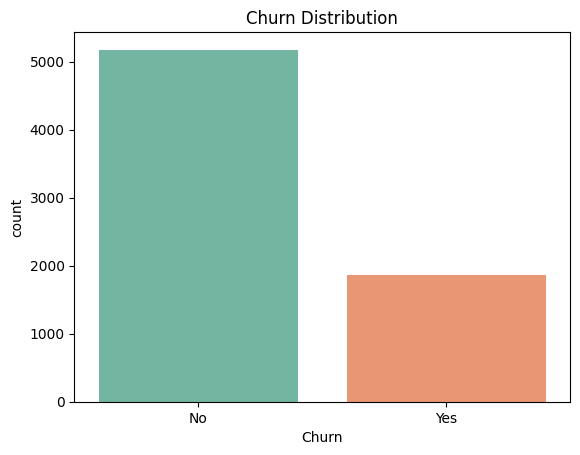

In [9]:
sns.countplot(x='Churn', data=data, hue='Churn', palette='Set2', legend=False)
plt.title('Churn Distribution')
plt.show()


# Step 6: Correlation Heatmap (numerical only)

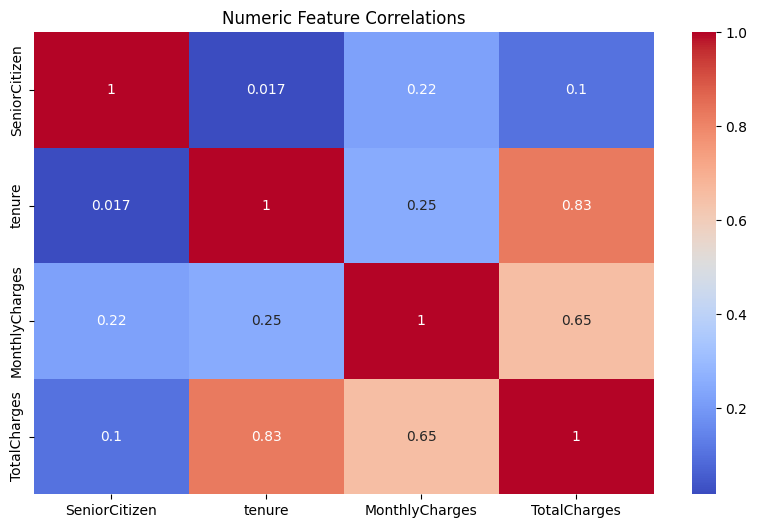

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

# Step 7: Visual Patterns (Categorical features vs Churn)

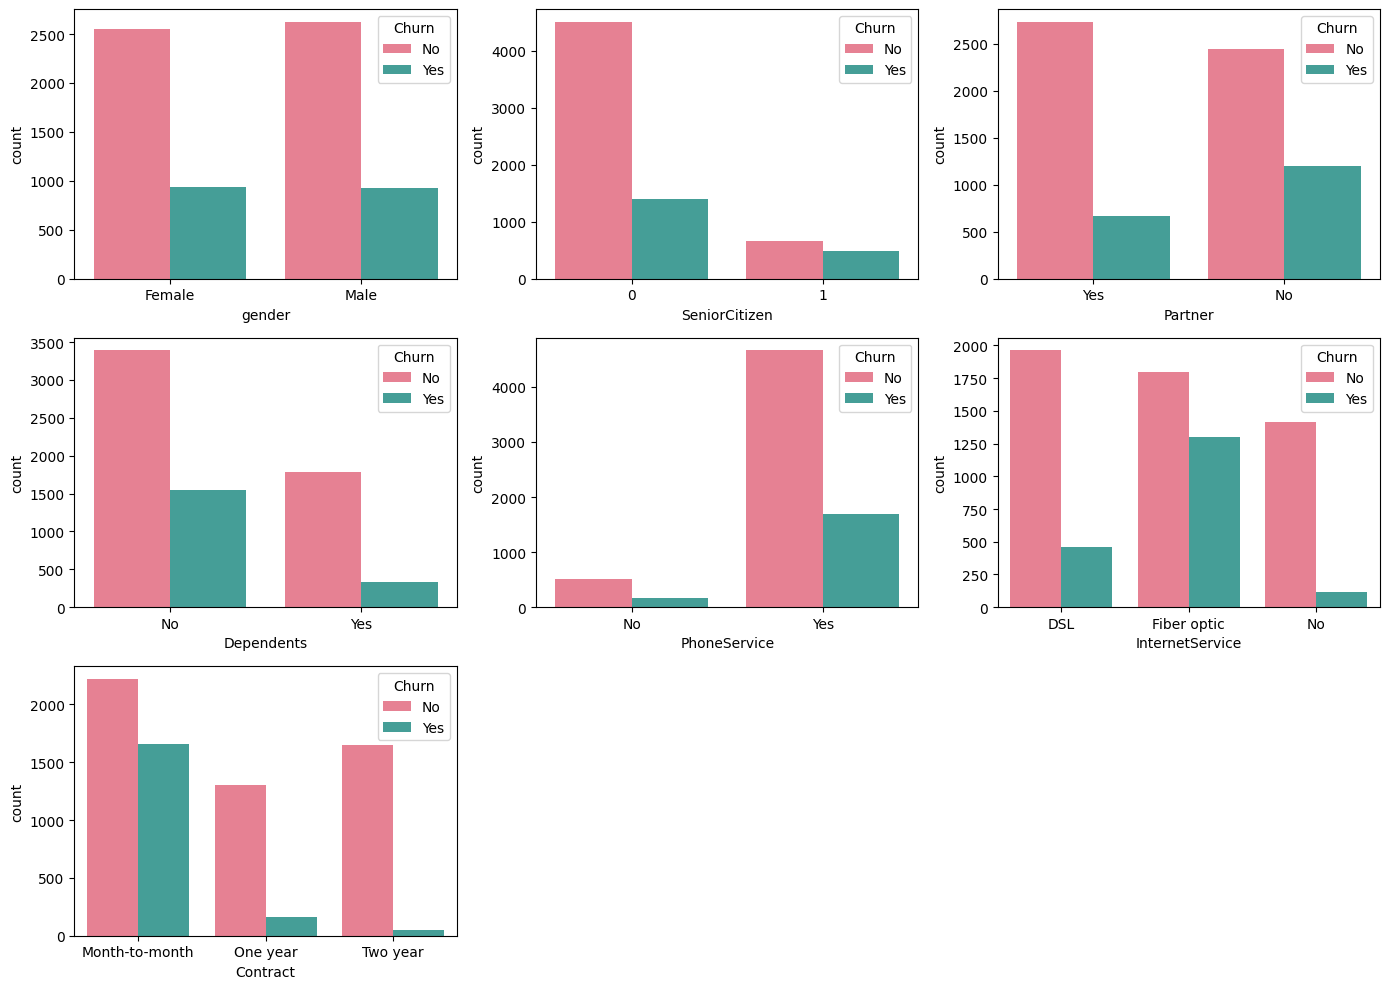

In [12]:
plt.figure(figsize=(14,10))
for i, col in enumerate(['gender','SeniorCitizen','Partner','Dependents','PhoneService','InternetService','Contract'], 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, hue='Churn', data=data, palette='husl')
    plt.tight_layout()
plt.show()

# Step 8: Encode Categorical Columns

In [14]:
le = LabelEncoder()
for col in data.select_dtypes('object').columns:
    data[col] = le.fit_transform(data[col])


# Step 9: Train-Test Split

In [15]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 10: Scaling

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 11: Build Multiple Models

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Define models (modern XGBoost syntax)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',    # essential metric
        random_state=42,
        n_estimators=200,         # match others for fairness
        learning_rate=0.1,
        max_depth=4
    )
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n {name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)




 Logistic Regression Accuracy: 0.8162
Confusion Matrix:
[[935 101]
 [158 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

------------------------------------------------------------

 Random Forest Accuracy: 0.8027
Confusion Matrix:
[[943  93]
 [185 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

------------------------------------------------------------

 Gradient Boosting Ac

In [20]:
print("\n Model Accuracy Summary:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



 Model Accuracy Summary:
Logistic Regression: 0.8162
Random Forest: 0.8027
Gradient Boosting: 0.8098
XGBoost: 0.8034


# Step 12: Compare Model Performance

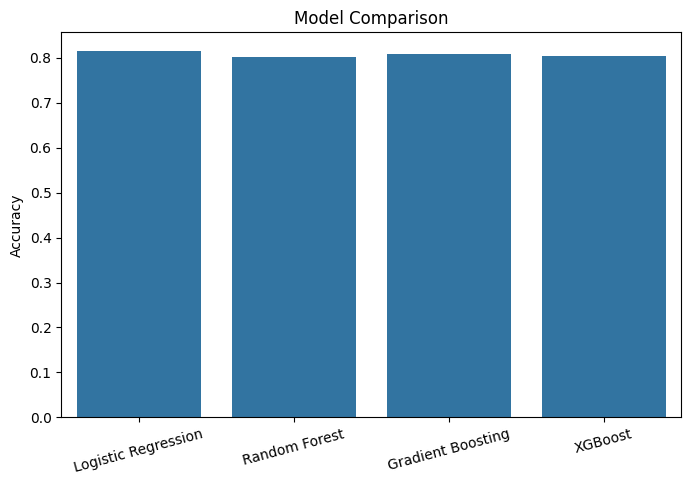

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()